In [1]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


In [2]:
def plot_datetime_strategies(
  datetimes: pd.Series, *,
  time_strategies = tlp.TIME_STRATEGIES):
  """Plot the mapping from datetime with the various time strategies.
  
  Args:
    datetimes: pd.Series containing all the considered datetimes (one per edge)
    time_strategies: Optional; A list containing functions that can map the
      datetime column of the edgelist to a float. See 
      tlp.feature.TIME_STRATEGIES.
  
  Usage:
    tlp.analysis.plot_datetime_strategies(edgelist['datetime'])
  """
  index = pd.to_datetime(
    np.linspace(datetimes.min().value, datetimes.max().value))
  with plt.rc_context({'xtick.top': True, 'ytick.right': True}):
    _, ax = plt.subplots(figsize=(4,4))
    df = pd.DataFrame(
      {str: func(index) for str, func in time_strategies.items()}, 
      index=index)
    df.plot(ax=ax, xlabel='Year', ylabel='Proportion',  
            xlim=datetimes.agg(['min', 'max']), ylim=(0,1))
    
    ax.legend(title='Time strategy') # type: ignore
     # type: ignore

In [3]:
df = pd.read_pickle('data/01/edgelist.pkl')

In [4]:
# df = df[df['datetime'].between(pd.Timestamp('1995-12-31'), pd.Timestamp('2005-01-01'))]

In [5]:
index = pd.to_datetime(np.linspace(df['datetime'].min().value, df['datetime'].max().value))

In [6]:
index_unix = index.astype(np.int64) / (365*24*3600e9)

In [7]:
index_unix = np.linspace(start=min(index_unix), stop=max(index_unix))

In [8]:
time_strategies['lin'](index_unix)

array([0.2 , 0.22, 0.24, 0.25, 0.27, 0.29, 0.3 , 0.32, 0.34, 0.35, 0.37,
       0.38, 0.4 , 0.42, 0.43, 0.45, 0.47, 0.48, 0.5 , 0.52, 0.52, 0.54,
       0.55, 0.57, 0.59, 0.6 , 0.62, 0.64, 0.65, 0.67, 0.68, 0.7 , 0.72,
       0.73, 0.75, 0.77, 0.78, 0.8 , 0.82, 0.83, 0.85, 0.86, 0.88, 0.9 ,
       0.91, 0.93, 0.95, 0.96, 0.98, 1.  ])

In [9]:
def lin(x):
  return .2 + .8 * (x-min(x)) / (max(x)-min(x))

In [10]:
def exp(x):
  return .2 + 0.8 * (np.exp(3*(x-min(x))/(max(x)-min(x)))-1) / (np.exp(3)-1)

In [11]:
def sqrt(x):
  return .2 + 0.8 * np.sqrt((x-min(x))/(max(x)-min(x)))

In [23]:
time_strategies = {'linear': lin, 'exponential': exp, 'square root': sqrt}

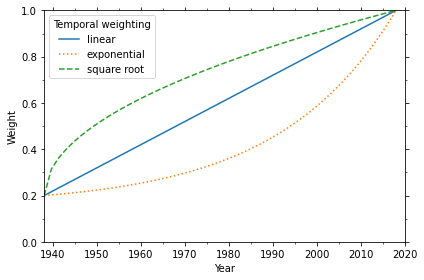

In [34]:
linestyles = ['solid', 'dotted', 'dashed']
with plt.rc_context({'xtick.top': True, 'ytick.right': True}):
  _, ax = plt.subplots()
  for (strategy_str, strategy_func), linestyle in zip(time_strategies.items(), linestyles):
    ax.plot(index, strategy_func(index_unix), label=strategy_str, linestyle=linestyle)
  ax.legend(title='Temporal weighting')
  ax.set_xlim((min(index), pd.Timestamp('01-01-2020')))
  ax.set_ylim((0,1))
  ax.set_xlabel('Year')
  ax.set_ylabel('Weight')
  ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
  ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
  ax.xaxis.set_minor_locator(matplotlib.dates.YearLocator(5))
  ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.1))
  plt.tight_layout()
  plt.savefig('code/figures/output/time-strategies.pdf')